### Lang Graph : https://langchain-ai.github.io/langgraph/tutorials/get-started/1-build-basic-chatbot/#2-create-a-stategraph

graph()
state
edges
nodes
invoke
stategraph()

DAG : dIRECT aCYCLIC GRAPH

In [12]:
def function1(input1):
    return input1 + "from first function" 

In [ ]:
def function2(input2):
    return input2 + " , Savita from second function" 

In [ ]:
def function3(input3):
    pass

In [55]:
function1("Sunny")

'Sunnyfrom first function'

In [56]:
function2("Savita")

'Savita ,from second function'

In [57]:
from langgraph.graph import Graph

In [58]:
workflow1 = Graph()

In [59]:
workflow1.add_node("fun1", function1)
workflow1.add_node("fun2", function2)


In [60]:
workflow1.add_edge("fun1","fun2")

In [61]:
workflow1.set_entry_point("fun1")





In [62]:
workflow1.set_finish_point("fun2")

In [64]:
app=workflow1.compile()

In [65]:
app.get_graph()

Graph(nodes={'fun1': Node(id='fun1', name='fun1', data=fun1(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'fun2': Node(id='fun2', name='fun2', data=fun2(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='fun1', data=None, conditional=False), Edge(source='fun1', target='fun2', data=None, conditional=False), Edge(source='fun2', target='__end__', data=None, conditional=False)])

In [52]:
from IPython.display import Image, display

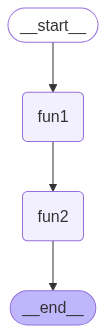

In [66]:
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:

app.invoke("Hi This is Sunny")

'Hi This is Sunnyfrom first function ,from second function'

In [148]:
for output in app.stream("hi this is Excellent"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from My_LLM
_______
That's great to hear! Is there anything I can help you with today?


here is output from TOKEN_COUNTER
_______
total token number in the generated answer is 13




In [133]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [134]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [135]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [136]:
work_flow2 = Graph()

In [137]:
work_flow2.add_node("My_LLM", llm)
work_flow2.add_node("TOKEN_COUNTER", token_counter)

In [138]:
work_flow2.add_edge("My_LLM","TOKEN_COUNTER")

In [139]:
work_flow2.set_entry_point("My_LLM")

In [140]:
work_flow2.set_finish_point("TOKEN_COUNTER")

In [141]:
app=work_flow2.compile()

In [142]:
app.get_graph()

Graph(nodes={'My_LLM': Node(id='My_LLM', name='My_LLM', data=My_LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'TOKEN_COUNTER': Node(id='TOKEN_COUNTER', name='TOKEN_COUNTER', data=TOKEN_COUNTER(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__start__': Node(id='__start__', name='__start__', data=None, metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='My_LLM', data=None, conditional=False), Edge(source='My_LLM', target='TOKEN_COUNTER', data=None, conditional=False), Edge(source='TOKEN_COUNTER', target='__end__', data=None, conditional=False)])

In [143]:
from IPython.display import Image, display

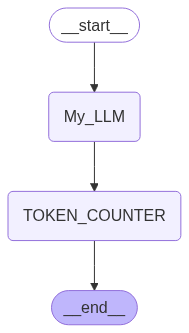

In [144]:
display(Image(app.get_graph().draw_mermaid_png()))

In [145]:
app.invoke("Hi This is Sunny")

'total token number in the generated answer is 8'

In [146]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai.  It's not a single entity but a network of over 100 operating companies, under the umbrella of Tata Sons, a holding company.  Its history, scale, and influence are vast, making a comprehensive overview challenging, but here's a detailed look at various aspects:

**I. History and Founding:**

* **Early Days:** The group's origins trace back to 1868 with the establishment of a trading company in Mumbai by Jamsetji Tata.  His visionary leadership laid the foundation for the conglomerate's diversification and commitment to social responsibility.  Key early ventures included textile mills and hydroelectric power generation.
* **Diversification and Growth:**  Under subsequent leadership, the group expanded aggressively into diverse sectors, including steel (Tata Steel), automobiles (Tata Motors), hospitality (Taj Hotel